In [72]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 30 20:11:19 2016

@author: stephen
"""
 
from __future__ import print_function
 
from tensorflow import keras
import numpy as np
import pandas as pd

def readucr(filename):
    data = np.loadtxt(filename, delimiter = ',')
    Y = data[:,0]
    X = data[:,1:]
    return X, Y
  
nb_epochs = 200


#flist = ['Adiac', 'Beef', 'CBF', 'ChlorineConcentration', 'CinC_ECG_torso', 'Coffee', 'Cricket_X', 'Cricket_Y', 'Cricket_Z', 
#'DiatomSizeReduction', 'ECGFiveDays', 'FaceAll', 'FaceFour', 'FacesUCR', '50words', 'FISH', 'Gun_Point', 'Haptics', 
#'InlineSkate', 'ItalyPowerDemand', 'Lighting2', 'Lighting7', 'MALLAT', 'MedicalImages', 'MoteStrain', 'NonInvasiveFatalECG_Thorax1', 
#'NonInvasiveFatalECG_Thorax2', 'OliveOil', 'OSULeaf', 'SonyAIBORobotSurface', 'SonyAIBORobotSurfaceII', 'StarLightCurves', 'SwedishLeaf', 'Symbols', 
#'synthetic_control', 'Trace', 'TwoLeadECG', 'Two_Patterns', 'uWaveGestureLibrary_X', 'uWaveGestureLibrary_Y', 'uWaveGestureLibrary_Z', 'wafer', 'WordsSynonyms', 'yoga']

flist  = ['Adiac']
for each in flist:
    fname = each
    x_train, y_train = readucr(fname+'/'+fname+'_TRAIN')
    x_test, y_test = readucr(fname+'/'+fname+'_TEST')
    nb_classes = len(np.unique(y_test))
    batch_size = min(x_train.shape[0]/10, 16)
    
    y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
    y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)
    
    
    Y_train = keras.utils.to_categorical(y_train, nb_classes)
    Y_test = keras.utils.to_categorical(y_test, nb_classes)
    
    x_train_mean = x_train.mean()
    x_train_std = x_train.std()
    x_train = (x_train - x_train_mean)/(x_train_std)
     
    x_test = (x_test - x_train_mean)/(x_train_std)
    x_train = x_train.reshape(x_train.shape + (1,1,))
    x_test = x_test.reshape(x_test.shape + (1,1,))

    x = keras.layers.Input(x_train.shape[1:])
#    drop_out = Dropout(0.2)(x)
    conv1 = keras.layers.Conv2D(128, 8, 1, padding='same')(x)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.Activation('relu')(conv1)
    
#    drop_out = Dropout(0.2)(conv1)
    conv2 = keras.layers.Conv2D(256, 5, 1, padding='same')(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.Activation('relu')(conv2)
    
#    drop_out = Dropout(0.2)(conv2)
    conv3 = keras.layers.Conv2D(128, 3, 1, padding='same')(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.Activation('relu')(conv3)
    
    full = keras.layers.GlobalAveragePooling2D()(conv3)
    out = keras.layers.Dense(nb_classes, activation='softmax')(full)
    
    
    model = keras.models.Model(inputs=x, outputs=out)
     
    optimizer = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
     
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                      patience=50, min_lr=0.0001) 
    hist = model.fit(x_train, Y_train, batch_size=batch_size, epochs=nb_epochs,
              verbose=3, validation_data=(x_test, Y_test), callbacks = [reduce_lr])
    #Print the testing results which has the lowest training loss.
    log = pd.DataFrame(hist.history)


Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

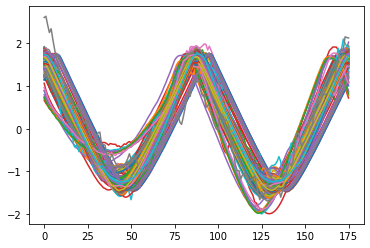

In [155]:
plt.plot(x_train[...,0,0].T);

In [163]:
conv1

<KerasTensor: shape=(None, 176, 1, 128) dtype=float32 (created by layer 'activation_12')>

In [111]:
for w in model.get_weights():
    print(w.shape)

(8, 8, 1, 128)
(128,)
(128,)
(128,)
(128,)
(128,)
(5, 5, 128, 256)
(256,)
(256,)
(256,)
(256,)
(256,)
(3, 3, 256, 128)
(128,)
(128,)
(128,)
(128,)
(128,)
(128, 37)
(37,)


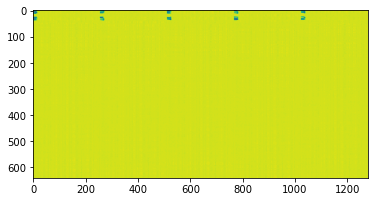

In [139]:
plt.imshow(model.layers[4].get_weights()[0].reshape((5*128, 5* 256)))

In [105]:
model_ = keras.models.Sequential()

In [106]:
model_.add(keras.layers.Conv2D(5, (3, 3)))

In [107]:
model_.build(input_shape=(None, 10, 20, 2))

In [108]:
model_.get_weights()

[array([[[[ 0.29015425,  0.14555058, -0.02945289,  0.06133479,
            0.00852743],
          [ 0.1277264 , -0.03270465,  0.08426744, -0.24748215,
            0.11852899]],
 
         [[-0.05153152,  0.04745916,  0.13075876, -0.22260696,
            0.18831745],
          [ 0.14648485, -0.04069951, -0.20976473,  0.08987767,
            0.2498264 ]],
 
         [[-0.13220993,  0.13729805,  0.21394917,  0.1072681 ,
           -0.10751913],
          [-0.23433663,  0.14144155, -0.08093365,  0.2350724 ,
            0.26299974]]],
 
 
        [[[-0.02040401, -0.16098796,  0.07971174, -0.2244328 ,
            0.2657127 ],
          [-0.22260645, -0.05480021, -0.0869347 , -0.09196505,
            0.04577202]],
 
         [[ 0.18565741, -0.11655335,  0.12104812,  0.13342696,
           -0.04934031],
          [ 0.02505177,  0.02689135,  0.27262756,  0.02368507,
           -0.01054698]],
 
         [[ 0.15681684, -0.29884937, -0.15964988,  0.07728463,
           -0.19733152],
          [-0.

In [109]:
model_.layers[0].get_weights()[0].shape

(3, 3, 2, 5)

In [165]:
x_test.shape

(391, 176, 1, 1)

In [172]:
import tensorflow as tf

In [174]:
tf.constant(model.predict(x_test))

<tf.Tensor: shape=(391, 37), dtype=float32, numpy=
array([[1.7918328e-08, 1.5131870e-07, 7.4032758e-09, ..., 1.7142618e-05,
        9.6276950e-04, 2.5705603e-04],
       [1.2060681e-13, 3.6790848e-07, 1.7279303e-08, ..., 5.2996583e-08,
        9.9932313e-01, 4.2778782e-07],
       [4.2624344e-04, 3.3624126e-08, 1.8921463e-07, ..., 1.1066505e-03,
        6.5436249e-04, 9.3498245e-02],
       ...,
       [1.8965218e-09, 3.2019526e-12, 4.2384676e-05, ..., 3.3019569e-02,
        8.3543114e-08, 2.8857514e-03],
       [6.0140570e-13, 8.1324043e-07, 3.9315740e-08, ..., 5.5433823e-08,
        9.9971837e-01, 5.4126139e-07],
       [4.3752465e-05, 2.1182226e-01, 7.9678968e-05, ..., 2.1779683e-06,
        5.2988089e-06, 7.6954886e-05]], dtype=float32)>

In [175]:
keras.activations.softmax(tf.constant(model.predict(x_test)))

<tf.Tensor: shape=(391, 37), dtype=float32, numpy=
array([[0.02583423, 0.02583424, 0.02583423, ..., 0.02583468, 0.02585912,
        0.02584088],
       [0.02582837, 0.02582838, 0.02582837, ..., 0.02582837, 0.07016128,
        0.02582838],
       [0.02625271, 0.02624153, 0.02624153, ..., 0.02627058, 0.0262587 ,
        0.02881342],
       ...,
       [0.02619775, 0.02619775, 0.02619887, ..., 0.02707723, 0.02619776,
        0.02627346],
       [0.02582792, 0.02582794, 0.02582792, ..., 0.02582792, 0.07018778,
        0.02582793],
       [0.02607292, 0.03222286, 0.02607386, ..., 0.02607184, 0.02607192,
        0.02607379]], dtype=float32)>

0.5617169737815857 0.5575447678565979


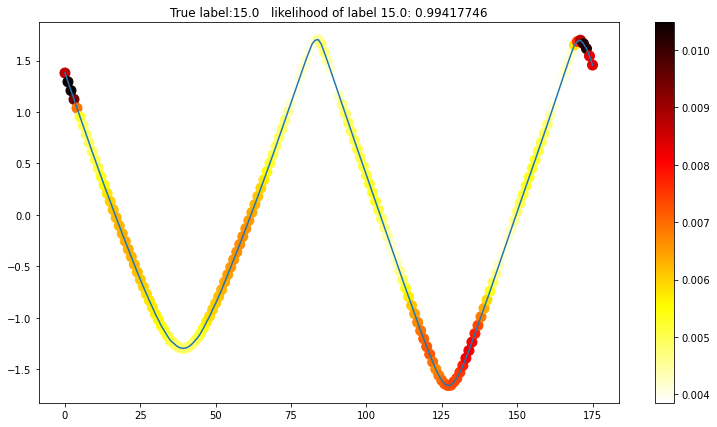

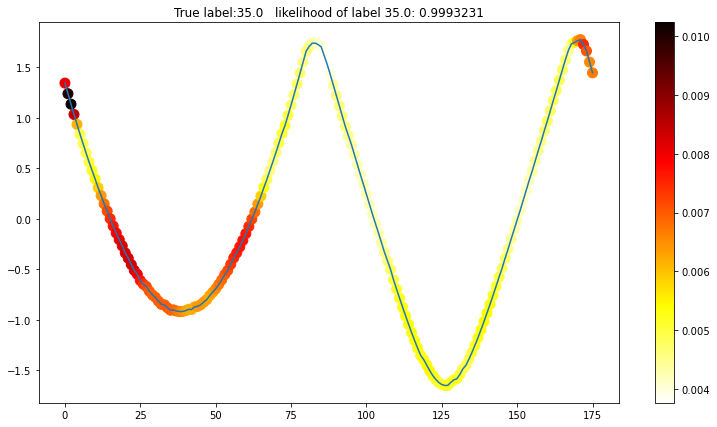

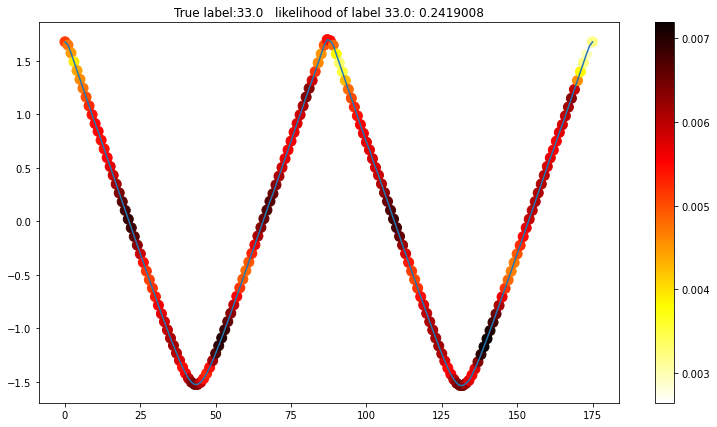

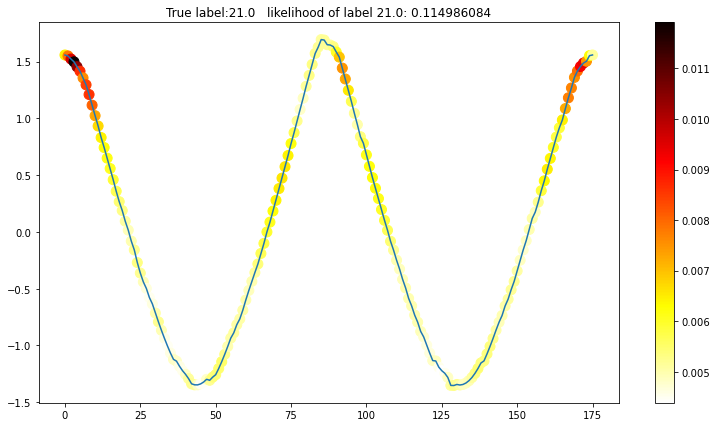

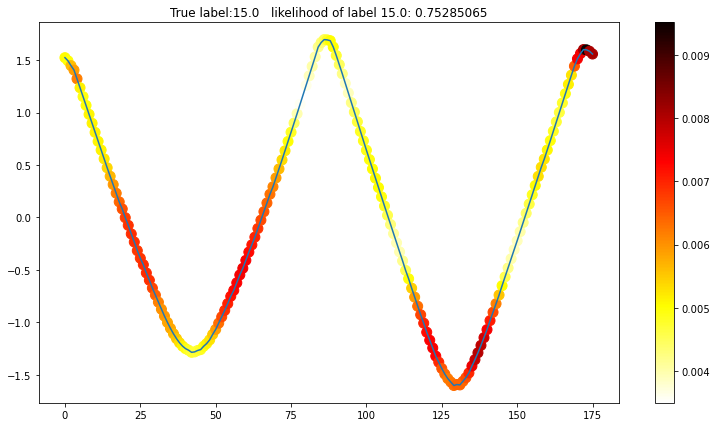

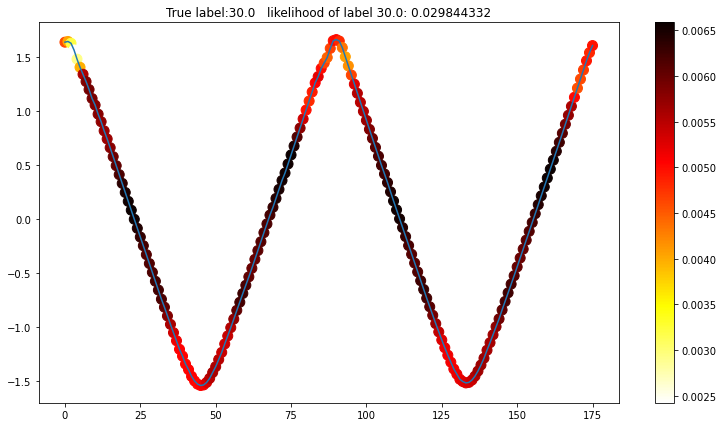

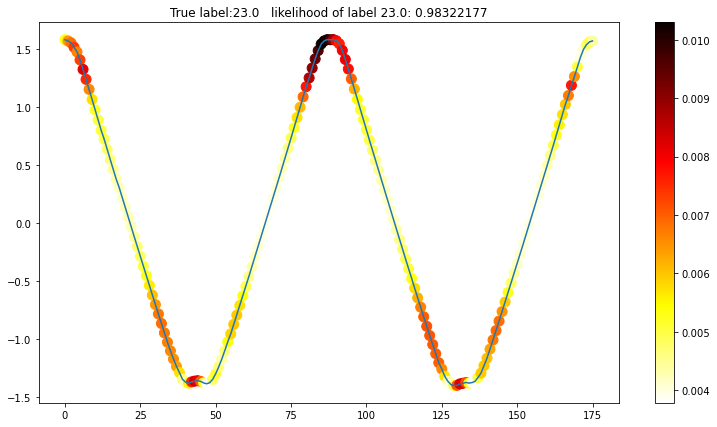

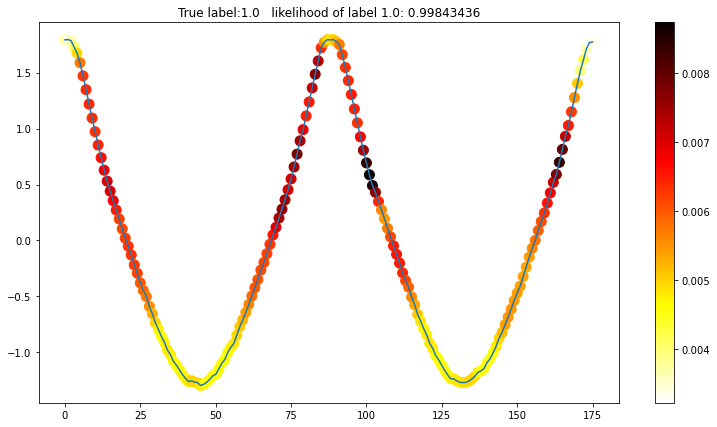

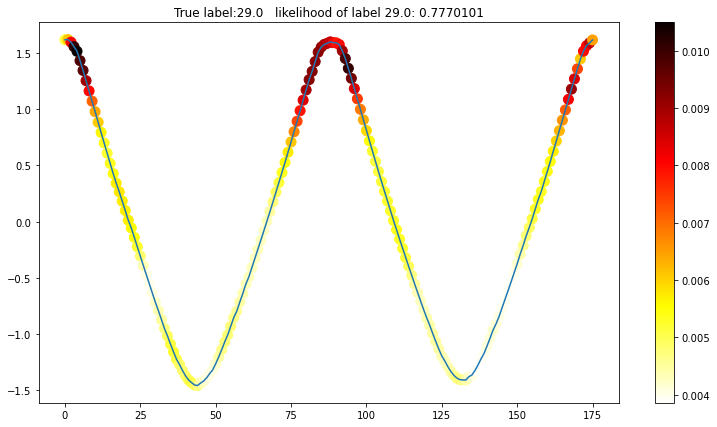

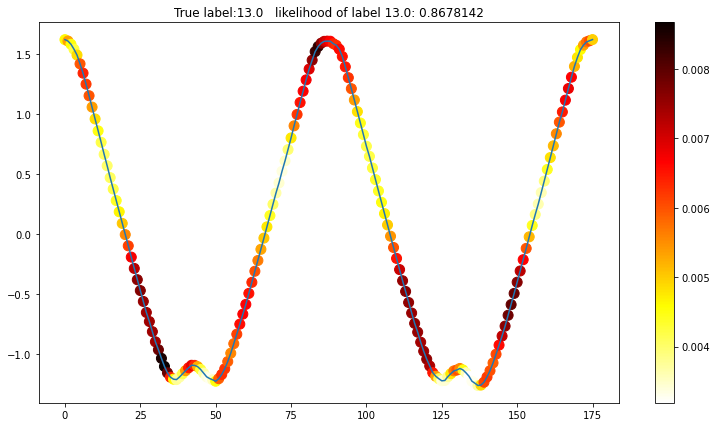

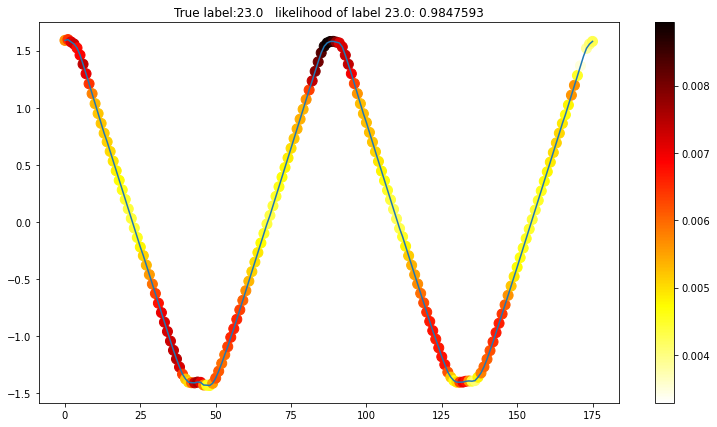

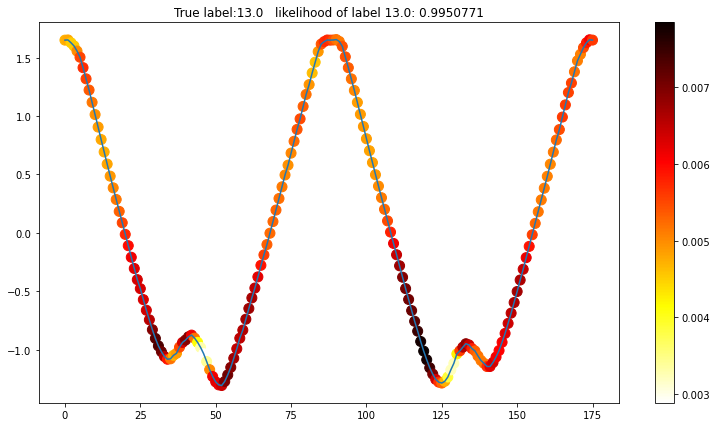

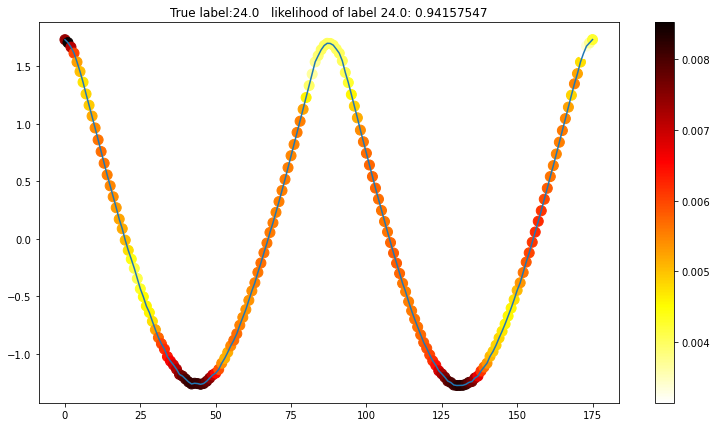

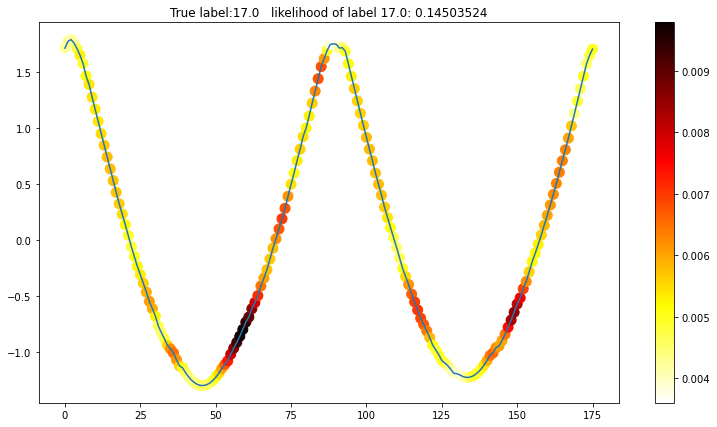

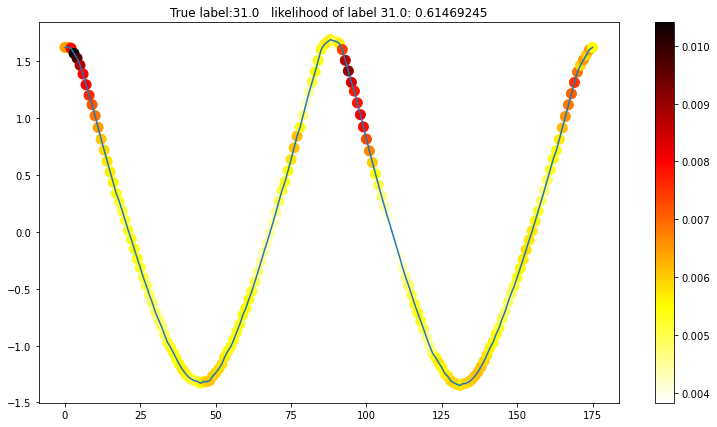

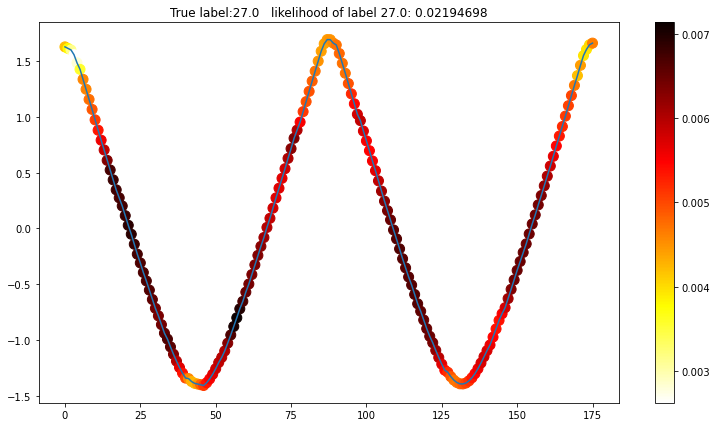

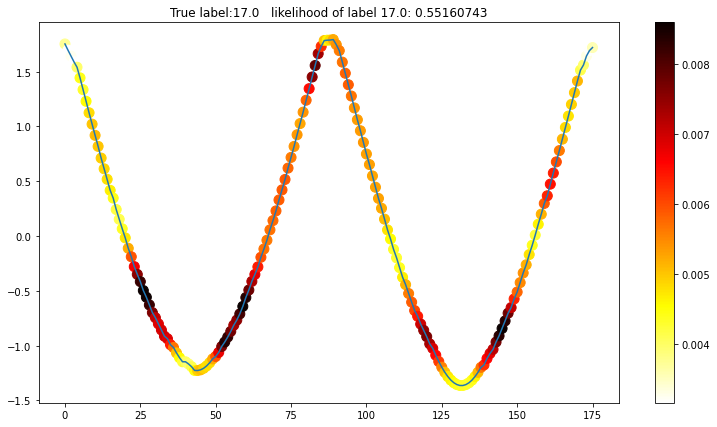

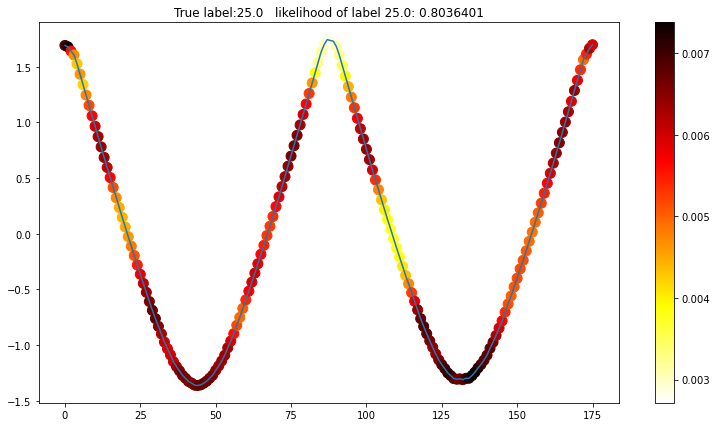

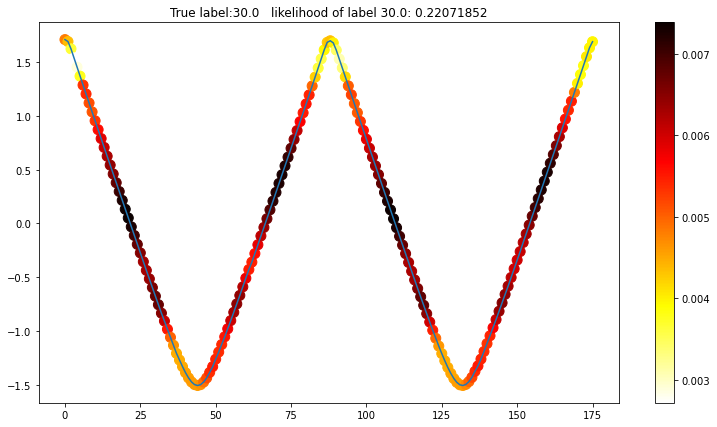

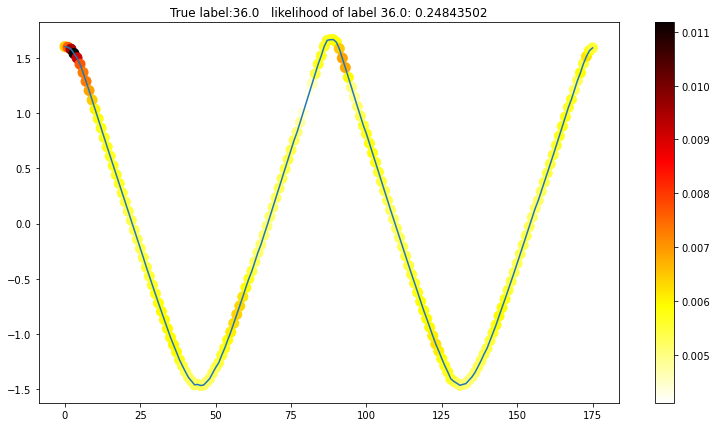

In [150]:
print(log.loc[log['loss'].idxmin]['loss'], log.loc[log['loss'].idxmin]['val_accuracy'])


############## Get CAM ################
import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages

get_last_conv = keras.backend.function([model.layers[0].input], [model.layers[-3].output])
last_conv = get_last_conv(x_test[:100])[0]

get_softmax = keras.backend.function([model.layers[0].input], [model.layers[-1].output])
softmax = get_softmax((x_test[:100]))[0]
softmax_weight = model.get_weights()[-2]
CAM = np.dot(last_conv, softmax_weight)


# pp = PdfPages('CAM.pdf')
for k in range(20):
    CAM = (CAM - CAM.min(axis=1, keepdims=True)) / (CAM.max(axis=1, keepdims=True) - CAM.min(axis=1, keepdims=True))
    c = np.exp(CAM) / np.sum(np.exp(CAM), axis=1, keepdims=True)
    plt.figure(figsize=(13, 7));
    plt.plot(x_test[k].squeeze());
    plt.scatter(np.arange(len(x_test[k])), x_test[k].squeeze(), cmap='hot_r', c=c[k, :, :, int(y_test[k])].squeeze(), s=100);
    plt.title(
        'True label:' + str(y_test[k]) + '   likelihood of label ' + str(y_test[k]) + ': ' + str(softmax[k][int(y_test[k])]))
    plt.colorbar();
#     pp.savefig()
#
# pp.close()

In [53]:
#!/usr/bin/env python2
# -*- coding: utf-8 -*-
"""
Created on Sun Oct 30 20:11:19 2016

@author: stephen
"""
 
from __future__ import print_function
 
from tensorflow import keras
import numpy as np
import pandas as pd

def readucr(filename):
    data = np.loadtxt(filename, delimiter = ',')
    Y = data[:,0]
    X = data[:,1:]
    return X, Y
  
nb_epochs = 20


#flist = ['Adiac', 'Beef', 'CBF', 'ChlorineConcentration', 'CinC_ECG_torso', 'Coffee', 'Cricket_X', 'Cricket_Y', 'Cricket_Z', 
#'DiatomSizeReduction', 'ECGFiveDays', 'FaceAll', 'FaceFour', 'FacesUCR', '50words', 'FISH', 'Gun_Point', 'Haptics', 
#'InlineSkate', 'ItalyPowerDemand', 'Lighting2', 'Lighting7', 'MALLAT', 'MedicalImages', 'MoteStrain', 'NonInvasiveFatalECG_Thorax1', 
#'NonInvasiveFatalECG_Thorax2', 'OliveOil', 'OSULeaf', 'SonyAIBORobotSurface', 'SonyAIBORobotSurfaceII', 'StarLightCurves', 'SwedishLeaf', 'Symbols', 
#'synthetic_control', 'Trace', 'TwoLeadECG', 'Two_Patterns', 'uWaveGestureLibrary_X', 'uWaveGestureLibrary_Y', 'uWaveGestureLibrary_Z', 'wafer', 'WordsSynonyms', 'yoga']

flist  = ['Adiac']
for each in flist:
    fname = each
    x_train, y_train = readucr(fname+'/'+fname+'_TRAIN')
    x_test, y_test = readucr(fname+'/'+fname+'_TEST')
    nb_classes = len(np.unique(y_test))
    batch_size = min(x_train.shape[0]/10, 16)
    
    y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
    y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)
    
    
    Y_train = keras.utils.to_categorical(y_train, nb_classes)
    Y_test = keras.utils.to_categorical(y_test, nb_classes)
    
    x_train_mean = x_train.mean()
    x_train_std = x_train.std()
    x_train = (x_train - x_train_mean)/(x_train_std)
     
    x_test = (x_test - x_train_mean)/(x_train_std)
    x_train = x_train.reshape(x_train.shape + (1,))
    x_test = x_test.reshape(x_test.shape + (1,))

    x = keras.layers.Input(x_train.shape[1:])
#    drop_out = Dropout(0.2)(x)
    conv1 = keras.layers.Conv1D(128, 8, padding='same')(x)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.Activation('relu')(conv1)
    
#    drop_out = Dropout(0.2)(conv1)
    conv2 = keras.layers.Conv1D(256, 5, padding='same')(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.Activation('relu')(conv2)
    
#    drop_out = Dropout(0.2)(conv2)
    conv3 = keras.layers.Conv1D(128, 3, padding='same')(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.Activation('relu')(conv3)
    
    full = keras.layers.GlobalAveragePooling1D()(conv3)
    out = keras.layers.Dense(nb_classes, activation='softmax')(full)
    
    
    model = keras.models.Model(inputs=x, outputs=out)
     
    optimizer = keras.optimizers.Adam()
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer,
                  metrics=['accuracy'])
     
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                      patience=50, min_lr=0.0001) 
    hist = model.fit(x_train, Y_train, batch_size=batch_size, epochs=nb_epochs,
              verbose=3, validation_data=(x_test, Y_test), callbacks = [reduce_lr])
    #Print the testing results which has the lowest training loss.
    log = pd.DataFrame(hist.history)

    print(log.loc[log['loss'].idxmin]['loss'], log.loc[log['loss'].idxmin]['val_accuracy'])




Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
2.2595293521881104 0.03069053776562214


In [54]:
############## Get CAM ################
import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages

get_last_conv = keras.backend.function([model.layers[0].input], [model.layers[-3].output])
last_conv = get_last_conv(x_test[:100])[0]

get_softmax = keras.backend.function([model.layers[0].input], [model.layers[-1].output])
softmax = get_softmax((x_test[:100]))[0]
softmax_weight = model.get_weights()[-2]
CAM = np.dot(last_conv, softmax_weight)

In [59]:
print(last_conv.shape, softmax_weight.shape, x_test[:100].shape, softmax.shape)

(100, 176, 128) (128, 37) (100, 176, 1) (100, 37)


In [4]:
binning = 5

In [5]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [6]:
num_mc_runs = 100

In [184]:
file_name = f'ec3_stim_anneal_spins{7}_clauses{5}' + \
            f'_runs{num_mc_runs}_temp{10}_{1}'
path = f'../ML_MC/{file_name}.npz'
data = np.load(path)

ftrs = data['res_mc_timelines']
lbls = data['res_fidelity'][:, -1]

# Perform min max normalization.
ftrs = ftrs - ftrs.min()
ftrs /= ftrs.max() - ftrs.min()

as_channels = True

if not as_channels:
    lbls = lbls.repeat(10, axis = 0)
    ftrs = ftrs.transpose((0, 2, 1)).reshape((-1, num_mc_runs))

if type(binning) == int:
    binning = np.linspace(lbls.min() - 1e-3, lbls.max() + 1e-3, binning + 1)
# Set classes for fidelity.
nb_classes = binning.shape[0] - 1

# One-hot representation
lbls = np.digitize(lbls, binning)


X_train, X_test, Y_train, Y_test = train_test_split(
            ftrs, lbls, test_size = .2)



In [185]:
from __future__ import print_function
 
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow.keras.regularizers import l1, l2
  
nb_epochs = 1000
n_conv = 32
l1_reg = .0001
drp = 0.0
lr = 0.0001

x_train, y_train = X_train, Y_train
x_test, y_test = X_test, Y_test
nb_classes = len(np.unique(y_test))
batch_size = 256#min(x_train.shape[0]/10, 16)

y_train = (y_train - y_train.min())/(y_train.max()-y_train.min())*(nb_classes-1)
y_test = (y_test - y_test.min())/(y_test.max()-y_test.min())*(nb_classes-1)


Y_train = keras.utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.to_categorical(y_test, nb_classes)

x_train_mean = x_train.mean()
x_train_std = x_train.std()
x_train = (x_train - x_train_mean)/(x_train_std)

x_test = (x_test - x_train_mean)/(x_train_std)
#x_train = x_train.reshape(x_train.shape + (1,))
#x_test = x_test.reshape(x_test.shape + (1,))

x = keras.layers.Input(x_train.shape[1:])
#drop_out = keras.layers.Dropout(drp)(x)
conv1 = keras.layers.Conv1D(n_conv, 8, padding='same', 
    kernel_regularizer = l2(l1_reg))(x)
conv1 = keras.layers.BatchNormalization()(conv1)
conv1 = keras.layers.Activation('relu')(conv1)

#drop_out = keras.layers.Dropout(drp)(conv1)
conv2 = keras.layers.Conv1D(2 * n_conv, 5, padding='same', 
    kernel_regularizer = l2(l1_reg))(conv1)
conv2 = keras.layers.BatchNormalization()(conv2)
conv2 = keras.layers.Activation('relu')(conv2)

#drop_out = keras.layers.Dropout(drp)(conv2)
conv3 = keras.layers.Conv1D(n_conv, 3, padding='same', 
    kernel_regularizer = l2(l1_reg))(conv2)
conv3 = keras.layers.BatchNormalization()(conv3)
conv3 = keras.layers.Activation('relu')(conv3)

full = keras.layers.GlobalAveragePooling1D()(conv3)
#full = keras.layers.Dropout(drp)(full)
out = keras.layers.Dense(nb_classes, activation='softmax')(full)


model = keras.models.Model(inputs=x, outputs=out)

optimizer = keras.optimizers.Adam(lr)
model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor = 'loss', factor=0.5,
                  patience=50, min_lr=0.0001) 
hist = model.fit(x_train, Y_train, batch_size=batch_size, epochs=nb_epochs,
          verbose=0, validation_data=(x_test, Y_test), callbacks = [reduce_lr])
#Print the testing results which has the lowest training loss.
log = pd.DataFrame(hist.history)

print(log.loc[log['loss'].idxmin]['loss'], log.loc[log['loss'].idxmin]['val_accuracy'])





0.1907530128955841 0.4790000021457672


Text(0.5, 0, 'epochs')

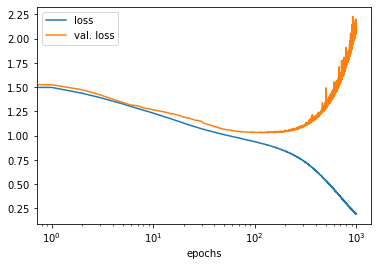

In [193]:
plt.semilogx(hist.history['loss'], label = 'loss')
plt.semilogx(hist.history['val_loss'], label = 'val. loss')
plt.legend()
plt.xlabel('epochs')

Text(0.5, 1.0, 'test set')

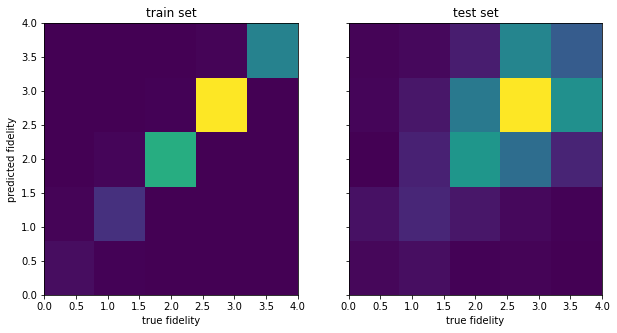

In [209]:
fig, axs = plt.subplots(ncols = 2, figsize=(10, 5), sharey = True)
axs[0].hist2d(y_train,
    np.argmax(model.predict(x_train), axis = 1), bins = 5);
axs[1].hist2d(y_test,
    np.argmax(model.predict(x_test), axis = 1), bins = 5);

axs[0].set_ylabel('predicted fidelity')
axs[0].set_xlabel('true fidelity')
axs[1].set_xlabel('true fidelity')

axs[0].set_title('train set')
axs[1].set_title('test set')

In [178]:
############## Get CAM ################
import matplotlib.pyplot as plt
# from matplotlib.backends.backend_pdf import PdfPages

get_last_conv = keras.backend.function([model.layers[0].input], [model.layers[-3].output])
last_conv = get_last_conv(x_test[:100])[0]

get_softmax = keras.backend.function([model.layers[0].input], [model.layers[-1].output])
softmax = get_softmax((x_test[:100]))[0]
softmax_weight = model.get_weights()[-2]
CAM = np.dot(last_conv, softmax_weight)



Text(0, 0.5, 'CAM(t)')

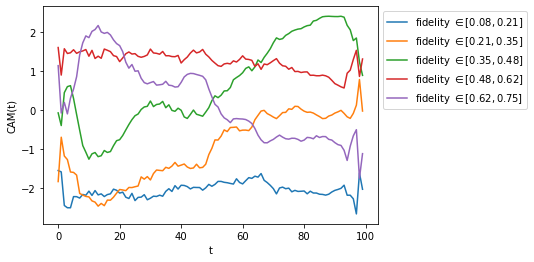

In [223]:
for i in range(len(binning) - 1):
    plt.plot(np.average(CAM[..., i], axis = 0), 
        label = f'fidelity $\in [{binning[i].round(2)},{binning[i+1].round(2)}]$')
plt.legend(bbox_to_anchor = (1, 1))
plt.xlabel('t')
plt.ylabel('CAM(t)')

normalization?

Text(0, 0.5, 'CAM(t)')

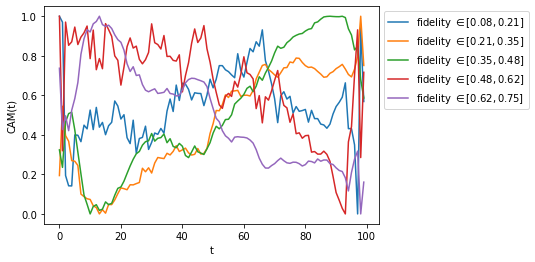

In [227]:
for i in range(len(binning) - 1):
    temp = np.average(CAM[..., i], axis = 0)
    plt.plot((temp - temp.min())/ (temp.max() - temp.min()), 
        label = f'fidelity $\in [{binning[i].round(2)},{binning[i+1].round(2)}]$')
plt.legend(bbox_to_anchor = (1, 1))
plt.xlabel('t')
plt.ylabel('CAM(t)')

Text(0.5, 1.0, 'CAM as colormap')

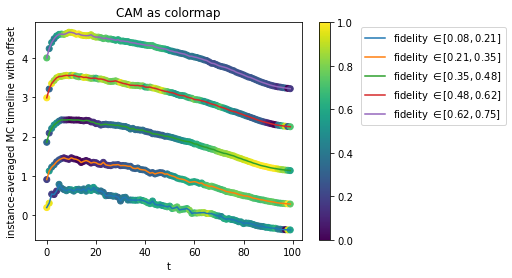

In [230]:
for i in range(len(binning) - 1):
    plt.plot(np.arange(100), i + np.average(x_test[y_test == i], axis = (0, -1)),
        label = f'fidelity $\in [{binning[i].round(2)},{binning[i+1].round(2)}]$')
    temp = np.average(CAM[..., i], axis = 0)
    plt.scatter(np.arange(100), i + np.average(x_test[y_test == i], axis = (0, -1)), 
        c = (temp - temp.min())/ (temp.max() - temp.min()))
    
plt.legend(bbox_to_anchor = (1.2, 1))
plt.xlabel('t')
plt.ylabel('CAM(t)')
plt.colorbar()
plt.ylabel('instance-averaged MC timeline with offset')
plt.xlabel('t')
plt.title('CAM as colormap')

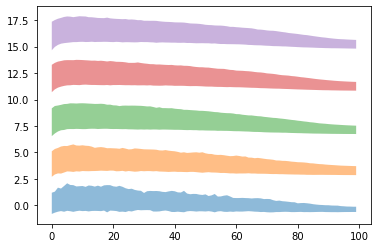

In [244]:
for i in range(len(binning) - 1):
    color = f'C{i}'
    fac = 4
    plt.fill_between(np.arange(100), 
        fac*i + np.average(x_test[y_test == i], axis = (0, -1)) + np.std(x_test[y_test == i], axis = (0, -1)),
        fac*i + np.average(x_test[y_test == i], axis = (0, -1)) - np.std(x_test[y_test == i], axis = (0, -1)),
        alpha = .5)

In [271]:
cmaps = ['Blues', 'Oranges', 'Greens', 'Reds', 'Purples']

Text(0.5, 1.0, 'CAM as colormap')

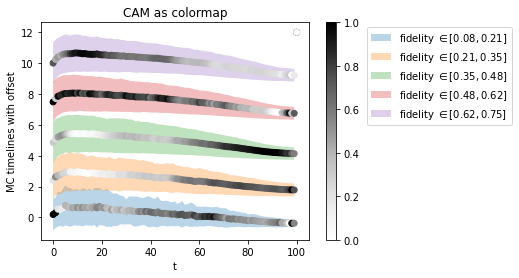

In [284]:
for i in range(len(binning) - 1):
    color = f'C{i}'
    fac = 2.5
    scale = 50
    temp = np.average(CAM[..., i], axis = 0)

    """plt.errorbar(np.arange(100), 
        fac * i + np.average(x_test[y_test == i], axis = (0, -1)), 
        yerr = np.std(x_test[y_test == i], axis = (0, -1)))"""
    
    
    plt.fill_between(np.arange(100), 
        fac*i + np.average(x_test[y_test == i], axis = (0, -1)) + np.std(x_test[y_test == i], axis = (0, -1)),
        fac*i + np.average(x_test[y_test == i], axis = (0, -1)) - np.std(x_test[y_test == i], axis = (0, -1)),
        alpha = .3, label = f'fidelity $\in [{binning[i].round(2)},{binning[i+1].round(2)}]$')
    
    plt.scatter(np.arange(100), 
        fac * i + np.average(x_test[y_test == i], axis = (0, -1)), 
        c = (temp - temp.min())/ (temp.max() - temp.min()),
        cmap = 'Greys')
p = plt.scatter([100, 100], [12, 12], c= [1, 0], cmap = 'Greys')
plt.colorbar(p)
plt.legend(bbox_to_anchor = (1.2, 1))
plt.xlabel('t')
plt.ylabel('CAM(t)')
plt.ylabel('MC timelines with offset')
plt.xlabel('t')
plt.title('CAM as colormap')

- review: Fawaz et al., "Deep learning for time series classification"
- Class Activation Map (CAM)
- Wang et al.: only architectures with Global Average Pooling (GAP) layer as second last one
- two architectures (with code!): FCN and ResNet

- two main datasets: 100 and 1000 simulated annealing timesteps
- different number of clauses: 4 to 9